In [ ]:
#install sentence transformer
!pip install -U sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
#import it
from sentence_transformers import SentenceTransformer


model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# mount google drive
import sys
if 'google.colab' in sys.modules:


    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the previously processed VSM-ACTR lines of traces across trails
file_path = '/content/drive/My Drive/processed_sentences2.txt'

import ast

# Dictionary to hold the sentence groups
sentences_dict = {}

# Read the entire file content
with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()
        if line:
            # Assuming the line format is 'sentenceX = [...]'
            key, value = line.split(' = ', 1)  # Split on the first equals sign
            try:
                # Convert the string list to a Python list using ast.literal_eval
                sentences_dict[key] = ast.literal_eval(value)
            except Exception as e:
                print(f"Error parsing the list for {key}: {e}")

# access sentences by labels, use sentences1 for example:
print("Contents of sentences1:")
print(sentences_dict['sentences1'])

Contents of sentences1:
['0.000   GOAL                   SET-BUFFER-CHUNK GOAL GOER NIL', '0.050   PROCEDURAL             PRODUCTION-FIRED CHOOSE-STRATEGY', '0.100   PROCEDURAL             PRODUCTION-FIRED DECIDE-BRUTE', '0.150   PROCEDURAL             PRODUCTION-FIRED BRUTE-DECISION', 'assembly is always a good place to reduce time!', '0.200   PROCEDURAL             PRODUCTION-FIRED REHEADCOUNT', '0.250   PROCEDURAL             PRODUCTION-FIRED STOP', 'this is the end of one decision making', 'Utility updates with Reward = -2.0   alpha = 0.2', 'Updating utility of production CHOOSE-STRATEGY', 'Updating utility of production DECIDE-BRUTE', 'Updating utility of production BRUTE-DECISION', 'Updating utility of production REHEADCOUNT', 'Updating utility of production STOP', '0.300   PROCEDURAL             PRODUCTION-FIRED CHOOSE-STRATEGY', '0.350   PROCEDURAL             PRODUCTION-FIRED DECIDE-BRUTE', '0.400   PROCEDURAL             PRODUCTION-FIRED BRUTE-DECISION', '0.450   PROCEDURAL  

In [ ]:
#get sentences1 embedding
sentences1 = sentences_dict['sentences1']
embedding1 = model.encode(sentences1)

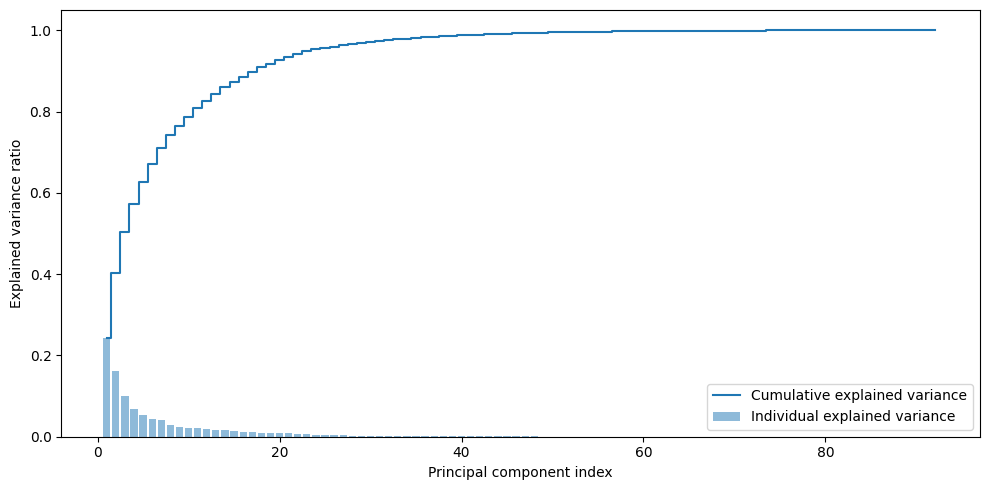

Variance explained by the first principal component: 24.22%


In [ ]:
#conduct Sree analysis
# Initialize PCA
pca_full = PCA()

# Fit PCA on the embeddings
pca_full.fit(embedding1)

# Get explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create a scree plot
plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Print the amount of variance explained by the first component
print(f"Variance explained by the first principal component: {explained_variance_ratio[0] * 100:.2f}%")

In [ ]:
# label all the subsymbolic ACT-R components for sementic analasis
labels1 = [
    'producedual' if 'PRODUCTION' in sentence
    else 'imaginal' if 'IMAGINAL' in sentence
    else 'goal' if 'GOAL' in sentence
    else 'utility' if 'UTILITY' in sentence or 'utility' in sentence
    else 'modify buffer' if 'MOD' in sentence
    else 'decisions'
    for sentence in sentences1
]


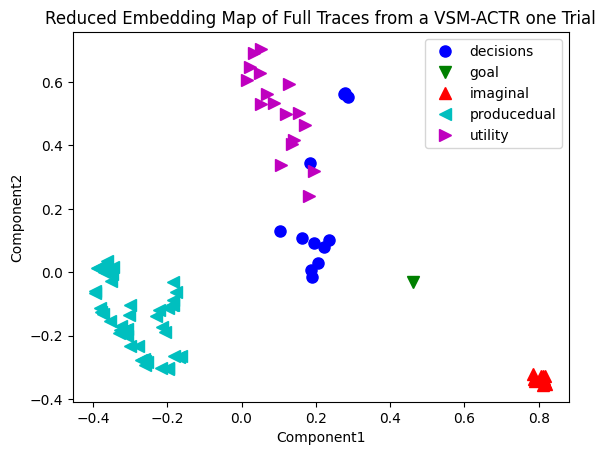

                    Multivariate linear model
                                                                 
------------------------------------------------------------------
        Intercept         Value   Num DF   Den DF  F Value  Pr > F
------------------------------------------------------------------
           Wilks' lambda  0.2054  5.0000  83.0000  64.2083  0.0000
          Pillai's trace  0.7946  5.0000  83.0000  64.2083  0.0000
  Hotelling-Lawley trace  3.8680  5.0000  83.0000  64.2083  0.0000
     Roy's greatest root  3.8680  5.0000  83.0000  64.2083  0.0000
-----------------------------------------------------------------
                                                                 
-----------------------------------------------------------------
         label           Value   Num DF  Den DF   F Value  Pr > F
-----------------------------------------------------------------
          Wilks' lambda  0.0004 20.0000 276.2297  137.1660 0.0000
         Pillai's trace

In [ ]:
#use PCA for dimensional reduction
from transformers import AutoTokenizer, AutoModel
import torch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.multivariate.manova import MANOVA

pca = PCA(n_components=5)
reduced_embedding = pca.fit_transform(embedding1)


# Create a DataFrame from the original embedding
df = pd.DataFrame(reduced_embedding)
df.columns = [f'Dim{i+1}' for i in range(reduced_embedding.shape[1])]
df['label'] = labels1

# Group by labels
groups = df.groupby('label')

# Plot the first two dimensions
fig, ax = plt.subplots()

# Define distinct colors and markers for each label
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 'v', '^', '<', '>', 's', 'p']

# Ensure each group is plotted with a distinct color and marker
for (name, group), color, marker in zip(groups, colors, markers):
    ax.plot(group.Dim1, group.Dim2, marker=marker, linestyle='', ms=8, label=name, color=color)

ax.legend()
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.title('Reduced Embedding Map of Full Traces from a VSM-ACTR one Trial')
plt.show()

# MANOVA analysis
formula = ' + '.join(df.columns[:-1]) + ' ~ label'
maov = MANOVA.from_formula(formula, data=df)
print(maov.mv_test())